In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#junk block
#random test code for experimentation
tmp = 'hello'
print (tmp[1:-1])
#try with left hand meant leftgoing wave?? ask if this what meant
#leave out sigma terms first

#add PML term 


ell


In [15]:
#utility functions
def deriv2(f, dx):
    fprimeprime = (f[2:] - 2*f[1:-1] + f[0:-2])/dx**2
    return fprimeprime
def deriv1(f, dx):
    #fprime = (f[2:] - f[1:-1])/dx
    fprime = (f[2:] - f[0:-2])/(2*dx)
    return fprime
def deriv1v2(f,dx):
    fprime = (f[2:] - f[0:-2])/(2*dx)
    #starting from third element - all elements except first and last, why??
    return fprime

x = np.linspace(-3., 3., 20)
dx = x[1] - x[0]                         #how does dx work for all of them??
a = b = 1 # for purposes of testing

In [16]:
#main functions
def solution(t, x):
    #copied from original, known solution to wave equation

    f = np.exp(-(t-x)**2) 
    return f

def initial_data(x):
    # ORIGINAL: 
    # f = np.exp(-x**2) 
    # fprime = 2.*x*np.exp(-x**2) 
    f = np.exp(-x**2)
    fprime = -1 * np.exp(-x**2)
    return np.array([f,fprime]) 

def rhs(t, f, a, b):
    #c = sqrt(ab) = phase velocity of wave, inputted?
    #sigma must be spacially dependent - step function or smth

    #coeffient = try gaussian, bump, or constant
    #with u and v
    dt_u = np.zeros_like(f[0])

    #CONSTANTS
    #sigmax = 1
    #sigmax = 2
    #sigmax = 3

    #BUMP FUNCTION
    aa = 1
    x0 = 200
    c = 2

    oneg = -1 * c
    opos = 1 * c
    outside = np.logical_or(x<= oneg, x>=opos)
    sigmax = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x: np.exp(aa * -1 * (1/((1-((x-x0)**2)/(c**2)))))])
    #sigmax = aa * (np.exp((-1*(1/(1-((x-x0)**2)))) / (c**2))) 
    #boolean array with slicing 
    # sigmax[x <= -1.] = 0.
    # sigmax[x >= +1.] = 0.


    #GAUSSIAN FUNCTION
    # aa = 1
    # x0 = 2
    # c = 0.1
    # sigmax = aa * np.exp(-1*((x-x0)**2) / (2*(c)**2)) 
    # plt.plot(x[1:-1], sigmax)
    #dampens more or less at edges based on function


    #du/dt = b*dv/dx - sig*u
    dt_u[1:-1] = b * deriv1(f[1], dx) - (sigmax[1:-1] * f[0][1:-1])

    dt_v = np.zeros_like(f[1]) 
    #dv/dt = a*du/dx - sig*v
    dt_v[1:-1] = a * deriv1(f[0], dx) - (sigmax[1:-1] * f[1][1:-1])

    return np.array([dt_u, dt_v])

In [17]:
# aa = 1
# x0 = 0
# c = 2
# #gauss 
# sigmax = aa * np.exp(-1*((x-x0)**2) / (2*(c)**2)) [1:-1]
# # wikibump1 = np.exp(1 * (1/((1-(x**2))))) 
# # wikibump[x < -1] = 0.
# # wikibump[x > 1] = 0.
# # can't use reg or or and
# #wikibump = np.piecewise(x, [x < 1, x > 1], [2, 0])
# #outside = np.any([x <=-1, x>=1])
# oneg = -1 * c
# opos = 1 * c
# outside = np.logical_or(x<= oneg, x>=opos)
# #wikibump = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x:  np.exp(-1 * (1/((1-(x**2)))))])
# #default = np.exp(-1 * (1/((1-(x**2)))))
# # for some reason gets error if puts outside using default :(
# bumpy = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x: np.exp(aa * -1 * (1/((1-((x-x0)**2)/(c**2)))))])
# plt.plot(x[1:-1], sigmax)
# plt.plot(x[1:-1], bumpy [1:-1])
# #plt.axis([-3, 3, -5, 5])

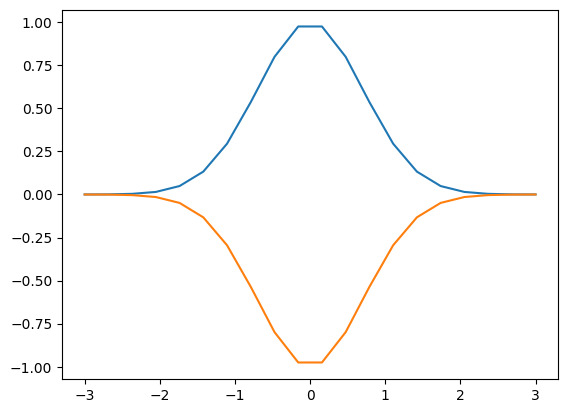

In [18]:
#plot u and v
t0 = 0
tmp = initial_data(x)
plt.plot(x, tmp[0])
plt.plot(x, tmp[1])

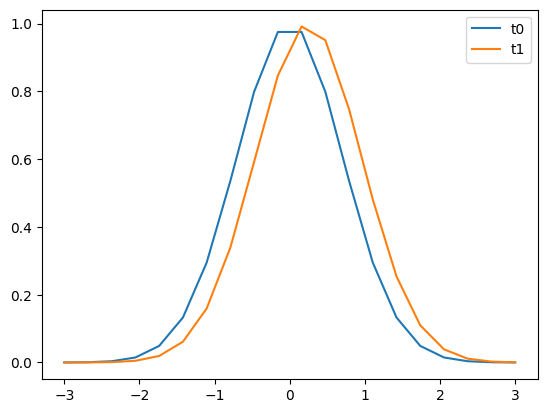

In [19]:
#testing block
t0 = 0.
t1 = 0.25
plt.plot(x, solution(t0, x), label="t0")
plt.plot(x, solution(t1, x), label="t1")
plt.legend();

In [20]:
# apply a boundary condtion at end points where derivatives cannot be computed
def dirichlet_boundary_condition(f):
    fout = f.copy()
    # set phi to zero at bondary
    fout[0][0] = 0.
    fout[0][-1] = 0.
    # set psi to zero at bondary -> phi stays zero
    fout[1][0] = 0.
    fout[1][-1] = 0.
    return fout

# apply a boundary condtion at end points where derivatives cannot be computed

#periodic will just loop back around
def periodic_boundary_condition(f):
    fout = f.copy()
    # periodic boundary conditions
    fout[0][0] = f[0][-2]
    fout[0][-1] = f[0][1]
    # set psi to zero at boundary -> phi stays zero
    fout[1][0] = f[1][-2]
    fout[1][-1] = f[1][1]
    return fout

boundary_condition = periodic_boundary_condition

# do a single RK2 method step
def rk2step(f, rhs, t, dt):
    #h f(xn, yn)
    k1 = rhs(t, f, 1, 1)
    f1 = f + 1./2.*dt*k1
    #hm
    f1 = boundary_condition(f1)
    
    #h f(xn + h2, yn + k1h/2)
    k2 = rhs(t + 1./2.*dt, f1, 1, 1)
    f2 = f + dt * k2
    f2 = boundary_condition(f2)
    return f2

def rk4step(f, rhs, t, dt):
    #k1 = rhs(t, f)
    k1 = rhs(t, f, 1, 1)
    #f1 = f + 1./2.*dt*k1  
    #f1 = boundary_condition(f1)
    
    
    f2 = f + (dt*1/2*k1)
    f2 = boundary_condition(f2)
    #k2 = f(t+h/2, yn + h*k1/2)
    k2 = rhs(t + 1./2.*dt, f2, 1, 1)


    f3 = f + (dt*1/2*k2)
    f3 = boundary_condition(f3)
    #k2 = f(t+h/2, yn + h*k1/2)
    k3 = rhs(t + 1./2.*dt, f3, 1, 1)

    f4 = f + (dt*k3)
    f4 = boundary_condition(f4)
    #k2 = f(t+h/2, yn + h*k1/2)
    k4 = rhs(t + dt, f4, 1, 1)

    final = f + 1/6*(k1 + 2*k2 + 2*k3 + k4)*dt
    final = boundary_condition(final)
    return final

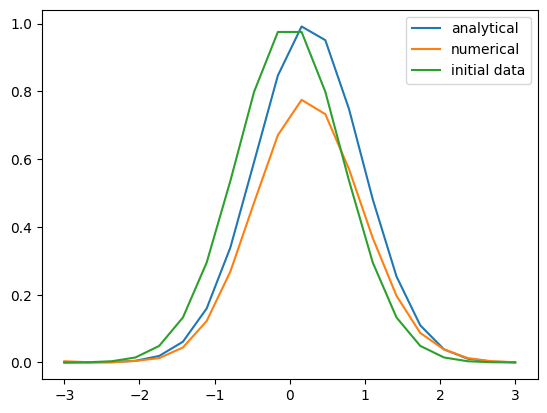

In [21]:
# test RK4 code
dt = 0.25

t0 = 0.
f0 = initial_data(x)

t1 = t0 + dt
f1 = rk4step(f0, rhs, t0, dt)

plt.plot(x, solution(t1, x), label="analytical")
plt.plot(x, f1[0], label="numerical")
plt.plot(x, f0[0], label="initial data")
plt.legend();

In [22]:
print (f1[0][-2])
print (f1[0][0])
print (boundary_condition(f1)[0][0])


0.003623317080627364
0.003623317080627364
0.003623317080627364


0.1999999999999993


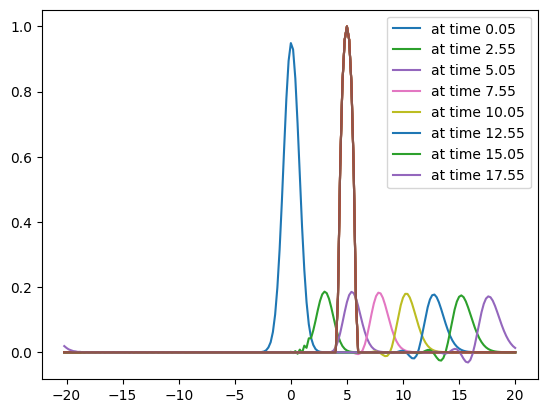

In [23]:
# now to the thing again for real...
import math
# start and end time
t0 = 0.
t1 = 20

# grid
xmin = -20
xmax = 20
ncells = 200
dx = (xmax - xmin) / ncells

#requires halo / ghost points for derivs
nhalo = 1 #why 1 again? is it just one left

x = np.linspace(xmin - nhalo * dx, xmax, ncells + 2*nhalo)

aa = 1
x0 = 5
c = 1

oneg = -1 * c + x0
opos = 1 * c + x0
outside = np.logical_or(x<= oneg, x>=opos)
sigmax = np.piecewise(x, [outside, np.logical_not(outside)], [0, lambda x: np.exp(aa * -1 * (1/((1-((x-x0)**2)/(c**2)))))]) * math.e

# grid spacing
dx = x[1] - x[0]
print(dx)
# time step
dt = dx/4. # this must be "small enough"

t = t0
f = initial_data(x)
it = 0
while (t < t1):
    fnext = rk4step(f, rhs, t, dt)
    #og rk2step

    t += dt
    f = fnext
    
    if(it % 50 == 0):
        plt.plot(x, f[0], label="at time %g" % t)
        plt.plot(x, sigmax)
    it += 1

zero = 0
#plt.plot(x, 0*x, label = "0")
#plt.plot(x, f[0], label="at time %g" % t)
plt.legend(loc='best');

#high frequency oscillations = instability
#approximation may pick up different modes, could grow exponentially instead of damping
#possibly always unstable
#initial data and solution must not blow up, either bug in rhs, derivs, or intrinsically unstable
# have to use rk4 

#shape of pml coefficient
#no real recipe - as smooth as possible
#derivatives of coefficient must be smooth as possible
#polynomial shape gives certain efficacy, like mx^2
#gaussian or bump function
#compact domain can be translated from 0,1 to whatever domain, basically step with smooth edges
#singular coefficient can be tried, but might break stuff
#gaussian easy, already there